In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


import os
root = os.path.expanduser('~')
data_path = root + '/Desktop/workspace/indeed/Job-Satisfaction/data'

In [3]:
pros = pd.read_csv(data_path+f'/companies/1_Walmart/output_data/px_data/pros.csv')
pros.head()

,Unnamed: 0,Review_Text,Unigrams,Bigrams,Trigrams
0,0,Good pay,pay,NaN,NaN
1,1,The only good part for me was it was close to ...,close hous,NaN,NaN
2,2,All ways an relxing work evironment.,NaN,NaN,NaN
3,3,Flexible scheduling around your life and your ...,cowork flexibl life schedul,flexibl_schedul,NaN
4,4,Benefits,benefit,NaN,NaN


In [2]:
def merge_data(company_list=[5]):
    df_company_list = pd.read_csv( data_path + '/scraper_data/review_site.csv')
    df_company_merged = pd.DataFrame()
    for company_index in company_list:
        company_name = df_company_list.iloc[company_index - 1]['Company_Name']
        df_company = pd.read_csv( data_path + f'/companies/{company_index}_{company_name}/{company_name}.csv')
        df_company_merged = pd.concat([df_company_merged, df_company], ignore_index=True)
    return df_company_merged

print(merge_data([5, 6]).shape)
df = merge_data([5, 6])
df.head()
print(merge_data(range(1, 51)).shape)


(41709, 17)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


(682176, 18)


In [23]:
df_former = df[df.Reviewer_Job_Status == 'Former Employee']
df_current = df[df.Reviewer_Job_Status == 'Current Employee']

display(df_former.shape)
display(df_current.shape)

(26693, 15)

(14314, 15)

In [27]:
26693 + 14314 + 702

41709

In [31]:
df_ = df[df.Reviewer_Job_Status != 'Former Employee']
df_ = df_[df_.Reviewer_Job_Status != 'Current Employee']
df_.shape
display(df_.head())

,Index,Rating_Number,Work_Life,Benefits,Job_Advancement,Management,Culture,Review_Title,Reviewer_Job_Title,Reviewer_Job_Status,Reviewer_Job_Location,Reviewed_Date,Review_Text,Pros,Cons
5,6,4.0,4.0,5.0,2.0,4.0,4.0,Good side job w/ possible opportunity to advance,Prime Now Shopper,Whole Foods,"Glendale, CA","July 13, 2019","Good pay relative to work difficulty, supporti...",NaN,NaN
66,67,5.0,4.0,5.0,4.0,4.0,4.0,Productive,Transportation Specialist,ROC,theadore,"July 10, 2019",Amazon is a steady work place with fast paced ...,NaN,NaN
123,124,4.0,4.0,5.0,3.0,4.0,4.0,Fun place to work,Web Developer II,Contractor,"Seattle, WA","July 8, 2019",- You can learn a lot very quickly in a very s...,NaN,NaN
337,338,5.0,0.0,0.0,0.0,0.0,0.0,Awesome work environment,Amazon Warehouse Associate,Via staffing agency,"Carlisle, PA","June 27, 2019",I worked as a seasonal inbound employee and ab...,NaN,NaN
759,760,4.0,4.0,4.0,5.0,4.0,5.0,Very fast paced and productive environment,"Amazon,",Stower,"Richmond, VA","June 10, 2019",Amazon had a lot of benefits for myself and my...,hourly rate with overtime,long shifts and excessive walking


In [41]:
total_sample = df_former.shape[0] + df_current.shape[0]
print(total_sample)

41007


In [52]:
df_former_rating = df_former.groupby('Rating_Number')['Rating_Number']\
                    .count().reset_index(name="Count")
df_former_rating['Count'] = round((df_former_rating['Count']/df_former.shape[0])*100, 2)
df_former_rating.head()

,Rating_Number,Count
0,1.0,10.54
1,2.0,9.97
2,3.0,23.45
3,4.0,27.50
4,5.0,28.55


In [53]:
df_current_rating = df_current.groupby('Rating_Number')['Rating_Number']\
                    .count().reset_index(name="Count")
df_current_rating['Count'] = round((df_current_rating['Count']/df_current.shape[0])*100, 2)
df_current_rating.head()

,Rating_Number,Count
0,1.0,7.33
1,2.0,9.64
2,3.0,25.28
3,4.0,30.45
4,5.0,27.30


In [54]:
df_former_current = pd.concat([df_former, df_current], ignore_index=True)

df_former_current_rating = df_former_current.groupby('Rating_Number')['Rating_Number']\
                    .count().reset_index(name="Count")
df_former_current_rating['Count'] = round((df_former_current_rating['Count']/total_sample)*100, 2)
df_former_current_rating.head()

,Rating_Number,Count
0,1.0,9.42
1,2.0,9.85
2,3.0,24.09
3,4.0,28.53
4,5.0,28.11


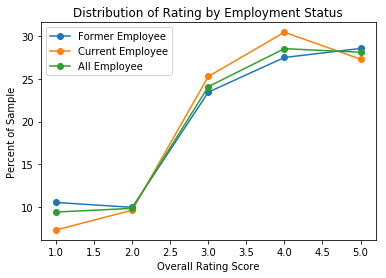

In [64]:
import matplotlib.pyplot as plt

plt.plot(df_former_rating['Rating_Number'], df_former_rating['Count'], marker='o', label='Former Employee')
plt.plot(df_current_rating['Rating_Number'], df_current_rating['Count'], marker='o', label='Current Employee')
plt.plot(df_former_current_rating['Rating_Number'], df_former_current_rating['Count'], marker='o', label='All Employee')

plt.xlabel('Overall Rating Score')
plt.ylabel('Percent of Sample')
plt.title('Distribution of Rating by Employment Status')
plt.legend()
plt.show()

